## **Estudiantes:**
1.   Emanuel Acevedo Muñoz
2.   Mateo Alexander Giraldo


## **El entregable debe contener.**

* Análisis de las variables (EDA) completo de las variables (1.0) Ir generando insights de las gráficas, tablas encontradas.

* Transformaciones de variables. Esto debe incluir eliminación de variables irrelevantes, imputación de nulos, revisión de variables redundantes (consultar la matriz de correlación), transformaciones que consideren necesarias para las variables categóricas, dummies, normalización, etc. (2.0)

* Explicación del modelo. Debe explicar de forma breve el modelo y sus
hiperparámetros. Comparar el árbol de decisión con respecto a k-vecinos (1.0)

* Realizar un apartado de evaluación. Encuentre las métricas de evaluación y detalle una explicación al respecto de dichas métricas respecto a los dos modelos evaluados. ¿Cuál escogerían y por qué? (1.0)


### **Nuestra variable objetivo**
Nuestro cliente desea saber las características más importantes que tienen los pacientes de
cierto tipo de enfermedad que terminan en hospitalización

#### **Importamos librerias**

In [ ]:
import pickle
import pandas as pd #Manejo de dataframes
import numpy as np #Manejo de listas
import matplotlib.pyplot as plt #Graficación
import seaborn as sns #Graficación

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree, neighbors
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler

#### **Importamos datos**

In [ ]:
# Cargamos los datos, utilizamos encoding latin-1 para leer valores en español
df = pd.read_csv('BBDD_Hospitalización(Datos).csv', encoding='latin-1')
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


## Analisis exploratorio de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [ ]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [ ]:
df['DIABETES'].value_counts()

,count
DIABETES,
NO,505
SI,63


In [ ]:
df['HOSPITALIZACIÓN ULTIMO MES'].value_counts()

,count
HOSPITALIZACIÓN ULTIMO MES,
NO,563
SI,5


In [ ]:
df['BIOPSIAS PREVIAS'].value_counts()

,count
BIOPSIAS PREVIAS,
NO,510
SI,56


In [ ]:
df['VOLUMEN PROSTATICO'].value_counts()

,count
VOLUMEN PROSTATICO,
SI,408
NO,159


<Axes: xlabel='DIABETES', ylabel='count'>

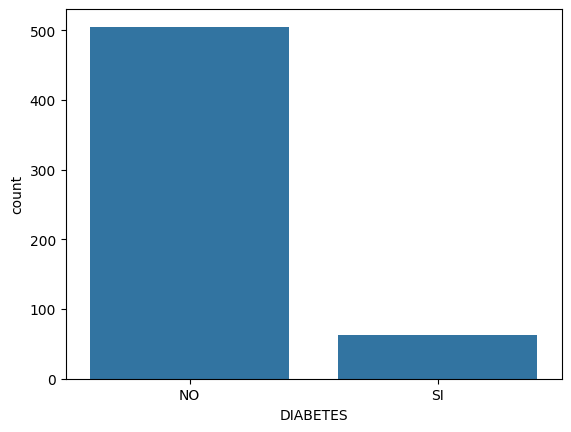

In [ ]:
# Grafico de casos de DIABETES
sns.countplot(x='DIABETES', data=df)

Encontramos muy pocos datos positivos con Diabetes, lo cual nos abre a pensar que tendremos que crear nuevos registros para tener un over sampler de casos positivos.

In [ ]:
df['BIOPSIA'].value_counts()

,count
BIOPSIA,
NEG,322
ADENOCARCINOMA GLEASON 7,106
ADENOCARCINOMA GLEASON 6,38
ADENOCARCINOMA GLEASON 8,22
ADENOCARCINOMA GLEASON 9,20
ADENOCARCINOMA GLEASON 6,16
PROSTATITIS,14
HIPERPLASIA PROSTATICA,14
ADENOCARCINOMA GLEASON 7,10


<Axes: xlabel='ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', ylabel='count'>

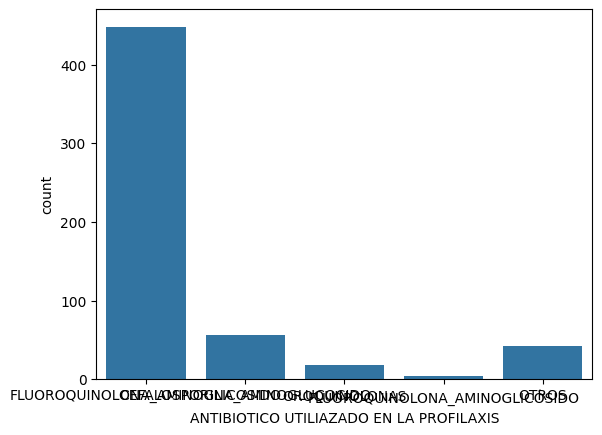

In [ ]:
# Grafico de los Antibioticos utilizados en la profilaxis
sns.countplot(x='ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', data=df)

In [ ]:
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].value_counts()

,count
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,
FLUOROQUINOLONA_AMINOGLICOSIDO,448
CEFALOSPORINA_AMINOGLUCOCIDO,56
OTROS,42
OROQUINOLONAS,18
FLUOROQUINOLONA_AMINOGLICÓSIDO,4


In [ ]:
df['DIAS HOSPITALIZACION MQ'].value_counts()

,count
DIAS HOSPITALIZACION MQ,
0.0,544
2.0,8
4.0,6
3.0,5
5.0,3
12.0,2


In [ ]:
df['DIAS HOSPITALIZACIÓN UPC'].value_counts()

,count
DIAS HOSPITALIZACIÓN UPC,
0.0,565
3.0,2
2.0,1


<Axes: xlabel='EDAD'>

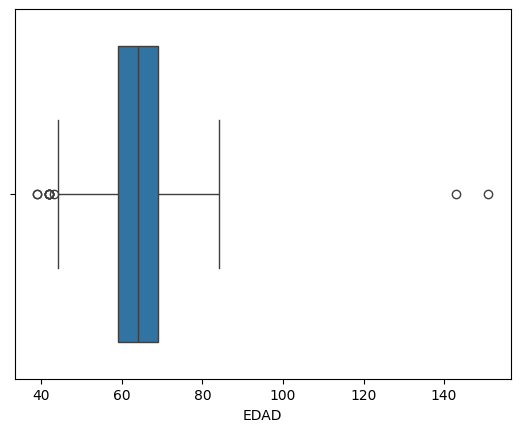

In [ ]:
sns.boxplot(x='EDAD', data=df)

Encontramos algunos datos atipicos en las edades, posiblemente valores introducidos erroneamente.

<Axes: xlabel='DIAS HOSPITALIZACIÓN UPC'>

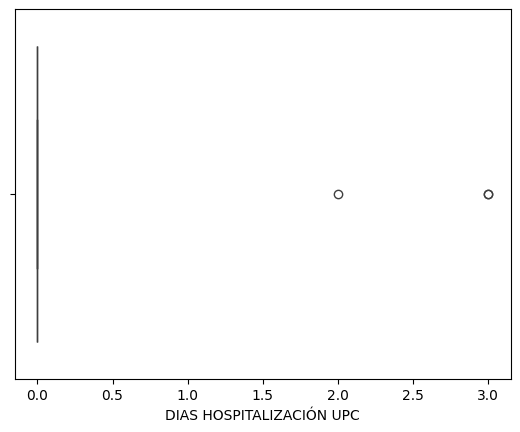

In [ ]:
sns.boxplot(x='DIAS HOSPITALIZACIÓN UPC', data=df)

<Axes: xlabel='NUMERO DE MUESTRAS TOMADAS'>

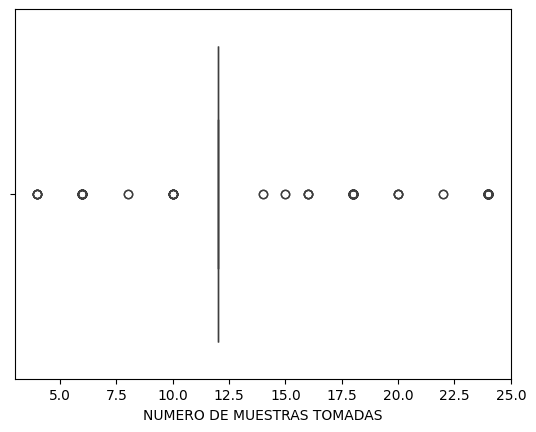

In [ ]:
sns.boxplot(x='NUMERO DE MUESTRAS TOMADAS', data=df)

<Axes: xlabel='DIAS HOSPITALIZACION MQ'>

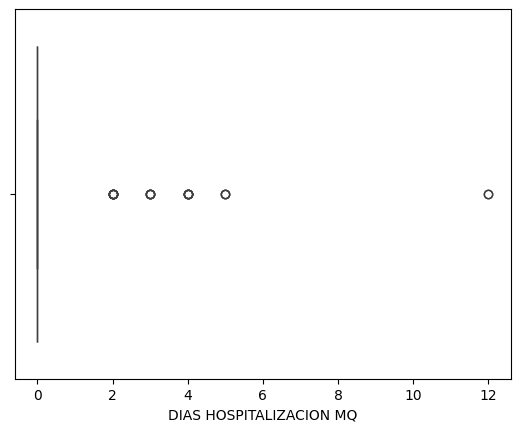

In [ ]:
sns.boxplot(x='DIAS HOSPITALIZACION MQ', data=df)

### **Limpieza de codigo**

In [ ]:
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].value_counts()

,count
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,
FLUOROQUINOLONA_AMINOGLICOSIDO,448
CEFALOSPORINA_AMINOGLUCOCIDO,56
OTROS,42
OROQUINOLONAS,18
FLUOROQUINOLONA_AMINOGLICÓSIDO,4


In [ ]:
col = 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'
df[df[col] == 'FLUOROQUINOLONA_AMINOGLICÓSIDO']

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
26,75.0,NO,NO,25.0,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
31,63.0,NO,NO,10.8,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
141,64.0,NO,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,6.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
155,58.0,NO,NO,16.0,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [ ]:
df[col].replace(['FLUOROQUINOLONA_AMINOGLICÓSIDO'], ['FLUOROQUINOLONA_AMINOGLICOSIDO'], inplace=True)

<ipython-input-21-01fe9403579c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(['FLUOROQUINOLONA_AMINOGLICÓSIDO'], ['FLUOROQUINOLONA_AMINOGLICOSIDO'], inplace=True)


In [ ]:
df[df[col] == 'FLUOROQUINOLONA_AMINOGLICÓSIDO']

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC


In [ ]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

,count
ENF. CRONICA PULMONAR OBSTRUCTIVA,
NO,546
SI,12
"SI, EPOC",4
"SI, ASMA",4


In [ ]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace(['SI, EPOC', 'SI, ASMA'], 'SI', inplace=True)

<ipython-input-24-3a2ee8ec909e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace(['SI, EPOC', 'SI, ASMA'], 'SI', inplace=True)


In [ ]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

,count
ENF. CRONICA PULMONAR OBSTRUCTIVA,
NO,546
SI,20


In [ ]:
col = 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'
df[col].value_counts()

,count
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,
NO,542
2,9
3,8
1,5
5,2
9,2


In [ ]:
df[col].replace(['NO'], '0', inplace=True)

<ipython-input-27-ebead1c6dba2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(['NO'], '0', inplace=True)


In [ ]:
df[col].value_counts()

,count
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,
0,542
2,9
3,8
1,5
5,2
9,2


<Axes: xlabel='EDAD'>

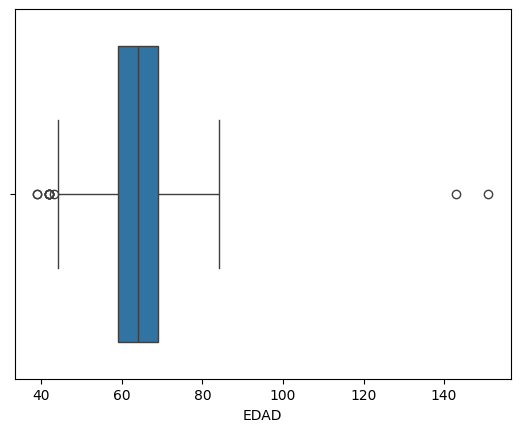

In [ ]:
# Tenemos algunas edades que presentan valores atipicos
sns.boxplot(x='EDAD', data=df)

In [ ]:
df[df['EDAD'] >= 90]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
161,143.0,SI,NO,6.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0.0,0.0
181,151.0,NO,NO,5.7,NO,SI,OTROS,12.0,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0.0,0.0


**Vemos que tenemos dos valores atipicos, en este caso, 143 y 151, vamos a cambiarlos por 43 y 51 respectivamente; vamos a suponer que en el momento de la digitacion de la edad, la persona agrego el 1 al inicio de la edad.**

In [ ]:
df.loc[161, 'EDAD'] = 43

In [ ]:
df.loc[181, 'EDAD'] = 51

#### **Vamos a filtrar las edades mayores a 80, ssegun las mediciones poblacionales, la edad de vida promedio es de 73.**

In [ ]:
df = df[df['EDAD'] < 80] # 73 Edad promedio de vida mundial

In [ ]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,NO,NO,6.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0.0,0.0
564,64.0,NO,NO,4.80,NO,SI,OTROS,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,0,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NaN,NO,NO,0.0,0.0


### **Imputación de nulos**

In [ ]:
# Revisemos los nulos que tenemos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       555 non-null    float64
 1   DIABETES                                                                   555 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 555 non-null    object 
 3   PSA                                                                        551 non-null    float64
 4   BIOPSIAS PREVIAS                                                           553 non-null    object 
 5   VOLUMEN PROSTATICO                                                         554 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

Nulos en
* PSA
* BIOPSIAS PREVIAS
* VOLUMEN PROSTATICO
* CUP
* ENF. CRONICA PULMONAR OBSTRUCTIVA
* AGENTE AISLADO
* HOSPITALIZACION

#### **PSA**

In [ ]:
df['PSA'].value_counts()

,count
PSA,
6.00,31
7.00,25
5.00,20
8.00,18
10.00,15
...,...
48.30,1
15.85,1
83.00,1


In [ ]:
df_oc= df[df['PSA'].isnull()]
df_oc

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
76,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,0,NO,NO,NO,NO,NO,NO,0.0,0.0
103,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0.0,0.0
121,62.0,NO,NO,NaN,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0.0,0.0


In [ ]:
# Llenamos los NaN con la moda
df['PSA'].fillna(df['PSA'].mode()[0], inplace=True)

<ipython-input-38-4c4e87100c51>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PSA'].fillna(df['PSA'].mode()[0], inplace=True)


#### **BIOPSIAS PREVIAS**

In [ ]:
df['BIOPSIAS PREVIAS'].value_counts()

,count
BIOPSIAS PREVIAS,
NO,497
SI,56


In [ ]:
df_oc= df[df['BIOPSIAS PREVIAS'].isnull()]
df_oc

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
92,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,0,NO,NO,NO,NO,NO,NO,0.0,0.0


In [ ]:
# Llenamos los NaN de BIOPSIAS PREVIAS con la moda
df['BIOPSIAS PREVIAS'].fillna(df['BIOPSIAS PREVIAS'].mode()[0], inplace=True)

<ipython-input-41-083cdcf1ec69>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BIOPSIAS PREVIAS'].fillna(df['BIOPSIAS PREVIAS'].mode()[0], inplace=True)


#### **VOLUMEN PROSTATICO**

In [ ]:
df['VOLUMEN PROSTATICO'].value_counts()

,count
VOLUMEN PROSTATICO,
SI,397
NO,157


In [ ]:
df_oc= df[df['VOLUMEN PROSTATICO'].isnull()]
df_oc

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
565,69.0,NO,NO,4.43,NO,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,0,NO,NO,NO,NO,NO,NO,0.0,0.0


In [ ]:
# Llenamos los NaN de VOLUMEN PROSTATICO con la moda
df['VOLUMEN PROSTATICO'].fillna(df['VOLUMEN PROSTATICO'].mode()[0], inplace=True)

<ipython-input-44-b76b310efa60>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VOLUMEN PROSTATICO'].fillna(df['VOLUMEN PROSTATICO'].mode()[0], inplace=True)


#### **CUP**

In [ ]:
df['CUP'].value_counts()

,count
CUP,
NO,552
SI,2


In [ ]:
df_oc= df[df['CUP'].isnull()]
df_oc

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
565,69.0,NO,NO,4.43,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,0,NO,NO,NO,NO,NO,NO,0.0,0.0


In [ ]:
# Llenamos los NaN de Ocupación con la moda
df['CUP'].fillna(df['CUP'].mode()[0], inplace=True)

<ipython-input-47-b7918755a3e6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CUP'].fillna(df['CUP'].mode()[0], inplace=True)


#### **ENF. CRONICA PULMONAR OBSTRUCTIVA**

In [ ]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

,count
ENF. CRONICA PULMONAR OBSTRUCTIVA,
NO,533
SI,20


In [ ]:
df_oc= df[df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].isnull()]
df_oc

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
566,67.0,NO,NO,8.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,0,NO,NO,NO,NO,NO,NO,0.0,0.0


In [ ]:
# Llenamos los NaN de ENF. CRONICA PULMONAR OBSTRUCTIVA con la moda
col_name = 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
df[col_name].fillna(df[col_name].mode()[0], inplace=True)

<ipython-input-50-ba775cda0e31>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].fillna(df[col_name].mode()[0], inplace=True)


#### **AGENTE AISLADO**

In [ ]:
df['AGENTE AISLADO'].value_counts()

,count
AGENTE AISLADO,
NO,530
E.COLI,6
PSEUDOMONAS AERUGINOSA,2


In [ ]:
df_oc= df[df['AGENTE AISLADO'].isnull()]
df_oc

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
26,75.0,NO,NO,25.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,SI,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NaN,NO,NO,0.0,0.0
99,70.0,NO,NO,7.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NaN,NO,NO,0.0,0.0
106,65.0,NO,NO,5.97,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NaN,NO,NO,0.0,0.0
115,56.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NaN,NO,NO,0.0,0.0
116,55.0,NO,NO,17.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NaN,NO,NO,0.0,0.0
126,74.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NaN,NO,NO,0.0,0.0
128,69.0,NO,NO,13.40,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NaN,NO,NO,0.0,0.0
129,63.0,NO,NO,11.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NaN,NO,NO,0.0,0.0
130,63.0,NO,NO,21.30,SI,SI,OTROS,24.0,NO,NO,NEG,0,NO,NO,NO,NaN,NO,NO,0.0,0.0
138,64.0,NO,NO,15.60,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NaN,NO,NO,0.0,0.0


In [ ]:
# Llenamos los NaN de AGENTE AISLADO con la moda
col_name = 'AGENTE AISLADO'
df[col_name].fillna(df[col_name].mode()[0], inplace=True)

<ipython-input-53-2b88d800821c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].fillna(df[col_name].mode()[0], inplace=True)


#### **HOSPITALIZACION**

In [ ]:
col_name = 'HOSPITALIZACION'
df[col_name].value_counts()

,count
HOSPITALIZACION,
NO,528
SI,24


In [ ]:
df_oc= df[df[col_name].isnull()]
df_oc

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
31,63.0,NO,NO,10.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,SI,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NaN,0.0,0.0
100,74.0,NO,NO,5.8,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NaN,0.0,0.0
109,61.0,NO,NO,7.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,0,NO,NO,NO,NO,NO,NaN,0.0,0.0


In [ ]:
# Llenamos los NaN de col_name con la moda
df[col_name].fillna(df[col_name].mode()[0], inplace=True)

<ipython-input-56-e35637bc330a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].fillna(df[col_name].mode()[0], inplace=True)


#### **Revisión de variables redundantes (consultar la matriz de correlación)**

#### Encontramos que las variables en la matriz de correlacion no estan correlacionada lo suficiente. Esto es un buen indicio para el analisis.

In [ ]:
df.corr(numeric_only=True)

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
EDAD,1.000000,0.155036,-0.146818,-0.022549,-0.032522
PSA,0.155036,1.000000,-0.194479,-0.032870,0.047337
NUMERO DE MUESTRAS TOMADAS,-0.146818,-0.194479,1.000000,0.088335,0.148197
DIAS HOSPITALIZACION MQ,-0.022549,-0.032870,0.088335,1.000000,0.249753
DIAS HOSPITALIZACIÓN UPC,-0.032522,0.047337,0.148197,0.249753,1.000000


In [ ]:
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

In [ ]:
columnas = ['EDAD', 'DIABETES', 'PSA','BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
            'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
            'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU',
            'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION']
df = df[columnas]

#### **Transformaciones que consideren necesarias para las variables categóricas, dummies, normalización, etc.**

In [ ]:
df.head()

,EDAD,DIABETES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53.0,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,SI,NO,NO,NO,NO,SI
1,56.0,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,SI,NO,NO,NO,NO,SI
2,57.0,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,56.0,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,SI,NO,NO,NO,NO,SI
4,55.0,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,SI,NO,HEMOCULTIVO,E.COLI,NO,SI


### **Creamos variables dummy para convertir**

In [ ]:
# Creamos variables dummy para convertir
columnas = ["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS", "BIOPSIA", "AGENTE AISLADO", "TIPO DE CULTIVO", "PATRON DE RESISTENCIA"]
df = pd.get_dummies(data=df, columns=columnas)
df.head()

,EDAD,DIABETES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,...,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,TIPO DE CULTIVO_HEMOCULTIVO,TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,53.0,NO,4.0,NO,SI,12.0,NO,NO,SI,NO,...,False,False,False,True,False,False,False,True,False,False
1,56.0,NO,7.7,NO,SI,12.0,NO,NO,SI,NO,...,False,False,False,True,False,False,False,True,False,False
2,57.0,NO,29.0,SI,SI,24.0,NO,NO,SI,NO,...,False,True,False,False,False,True,False,False,False,False
3,56.0,NO,7.0,NO,SI,12.0,NO,NO,SI,NO,...,False,False,False,True,False,False,False,True,False,False
4,55.0,NO,29.0,SI,SI,24.0,NO,NO,SI,NO,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 567
Data columns (total 37 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   EDAD                                                                                                   555 non-null    float64
 1   DIABETES                                                                                               555 non-null    object 
 2   PSA                                                                                                    555 non-null    float64
 3   BIOPSIAS PREVIAS                                                                                       555 non-null    object 
 4   VOLUMEN PROSTATICO                                                                                     

In [ ]:
# Convertir los True o False a 1 o 0
df = df*1

#### **Codifican las categorias de la VARIABLE A PREDECIR (OBJETIVO) - Reemplaza las categorias por un numero ordenado**

In [ ]:
# Se codifican las categorias de la VARIABLE A PREDECIR (OBJETIVO)
labelencoder = LabelEncoder()
# Reemplaza las categorias por un numero ordenado
df["DIABETES"] = labelencoder.fit_transform(df["DIABETES"])
df["PSA"] = labelencoder.fit_transform(df["PSA"])
df["BIOPSIAS PREVIAS"] = labelencoder.fit_transform(df["BIOPSIAS PREVIAS"])
df["CUP"] = labelencoder.fit_transform(df["CUP"])
df["VOLUMEN PROSTATICO"] = labelencoder.fit_transform(df["VOLUMEN PROSTATICO"])
df["ENF. CRONICA PULMONAR OBSTRUCTIVA"] = labelencoder.fit_transform(df["ENF. CRONICA PULMONAR OBSTRUCTIVA"])
df["FIEBRE"] = labelencoder.fit_transform(df["FIEBRE"])
df["ITU"] = labelencoder.fit_transform(df["ITU"])
df["HOSPITALIZACION"] = labelencoder.fit_transform(df["HOSPITALIZACION"])

In [ ]:
df["HOSPITALIZACION"]

,HOSPITALIZACION
0,1
1,1
2,1
3,1
4,1
...,...
563,0
564,0
565,0
566,0


In [ ]:
# Convert all columns to int objects
df = df.apply(lambda column: column.astype(int))

Explicación del modelo. Debe explicar de forma breve el modelo y sus
hiperparámetros. Comparar el árbol de decisión con respecto a k-vecinos (1.0)

### **Arbol de decision**

In [ ]:
X = df.drop("HOSPITALIZACION", axis=1) # Variables predictoras
Y = df['HOSPITALIZACION'] # Variables objetivo

### **Utilizamos OverSampler para crear nuevos registros para poder completar la data que necesita el modelo para ser mas preciso**

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [ ]:
X_resampled

,EDAD,DIABETES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,...,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,TIPO DE CULTIVO_HEMOCULTIVO,TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,53,0,10,0,1,12,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,56,0,52,0,1,12,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,57,0,120,1,1,24,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,56,0,46,0,1,12,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,55,0,120,1,1,24,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,69,0,33,0,0,12,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1058,56,0,46,0,1,12,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1059,53,0,46,0,1,12,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
1060,64,1,33,0,1,24,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
Y_resampled

,HOSPITALIZACION
0,1
1,1
2,1
3,1
4,1
...,...
1057,1
1058,1
1059,1
1060,1


In [ ]:
# Reemplazamos la data necesaria para entrenar el modelo
X, Y = X_resampled, Y_resampled

### **Hacemos el spit de los datos**

<Axes: xlabel='HOSPITALIZACION'>

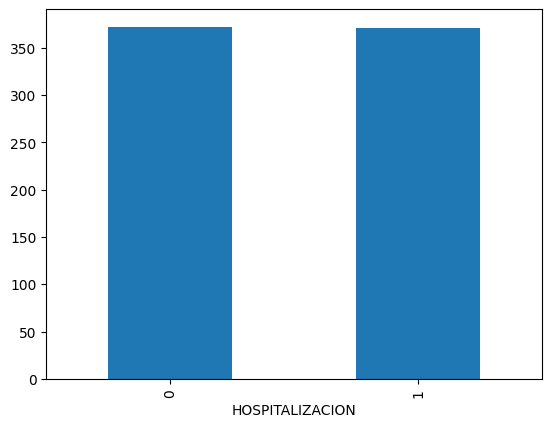

In [ ]:
# Separamos la informacion para entrenar y predecir dependiendo del modelo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

# Barras de la objetivo del 70%
Y_train.value_counts().plot(kind='bar')

#### **Optimización de hiperparámetros para el arbol**

In [ ]:
train_ac = []
test_ac = []

max_deep_list = list(range(2,10))

for i in max_deep_list:
  clf2 = tree.DecisionTreeClassifier(max_depth = i)
  clf2.fit(X_train, Y_train)
  y_pred_train = clf2.predict(X_train)
  y_pred_test = clf2.predict(X_test)
  train_ac.append(accuracy_score(Y_train,y_pred_train))
  test_ac.append(accuracy_score(Y_test,y_pred_test))


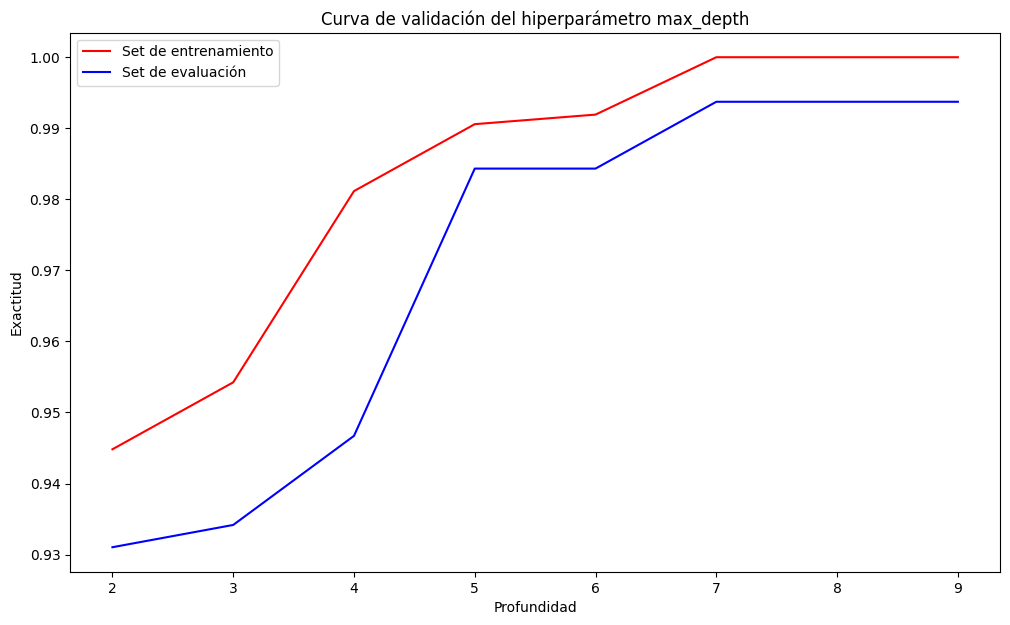

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(max_deep_list,train_ac,color='r',label="Set de entrenamiento")
plt.plot(max_deep_list,test_ac,color='b',label="Set de evaluación")
plt.title("Curva de validación del hiperparámetro max_depth")
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

#### **Obtenemos cuales son los mejores Hiperparametros para el arbol con GridSearch**

In [ ]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9]}

clf2 = tree.DecisionTreeClassifier()

clf2gvs= GridSearchCV(clf2, tree_para, cv=5)
clf2gvs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
# Obtenemos los mejores parametros que podemos utilizar para el arbol
clf2gvs.best_params_

{'criterion': 'entropy', 'max_depth': 7}

#### **Optimización de hiperparámetros para el KNN**

In [ ]:
train_ac = []
test_ac = []

max_deep_list = list(range(2,7))

for i in max_deep_list:
  model_Knn = neighbors.KNeighborsClassifier(n_neighbors=i, metric='minkowski') #minkowski - euclidean
  model_Knn.fit(X_train, Y_train) #70% datos

  y_pred_train = model_Knn.predict(X_train)
  y_pred_test = model_Knn.predict(X_test)
  train_ac.append(accuracy_score(Y_train,y_pred_train))
  test_ac.append(accuracy_score(Y_test,y_pred_test))


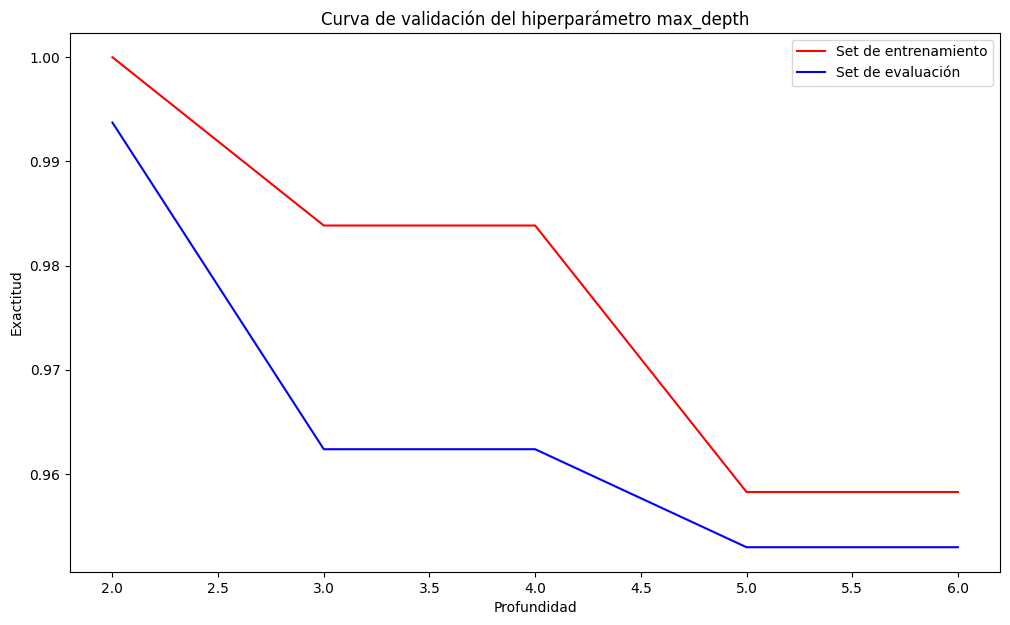

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(max_deep_list,train_ac,color='r',label="Set de entrenamiento")
plt.plot(max_deep_list,test_ac,color='b',label="Set de evaluación")
plt.title("Curva de validación del hiperparámetro max_depth")
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

#### **Obtenemos cuales son los mejores Hiperparametros para el KNN con GridSearch**

In [ ]:
tree_para = {'metric':['minkowski','euclidean'],'n_neighbors':[2,3,4,5,6]}

clf2 = neighbors.KNeighborsClassifier()

clf2gvs= GridSearchCV(clf2, tree_para, cv=5)
clf2gvs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': [2, 3, 4, 5, 6]})

In [ ]:
# Obtenemos los mejores parametros que podemos utilizar para el KNN
clf2gvs.best_params_

{'metric': 'minkowski', 'n_neighbors': 2}

### **Creación del modelo con el conjunto de entrenamiento**

In [ ]:
#Creación del modelo con el conjunto de entrenamiento
model_Tree = tree.DecisionTreeClassifier(max_depth=7, criterion="entropy")
model_Tree.fit(X_train, Y_train)#70% entrenamiento

DecisionTreeClassifier(criterion='entropy', max_depth=7)

#### **Mostramos el arbol**

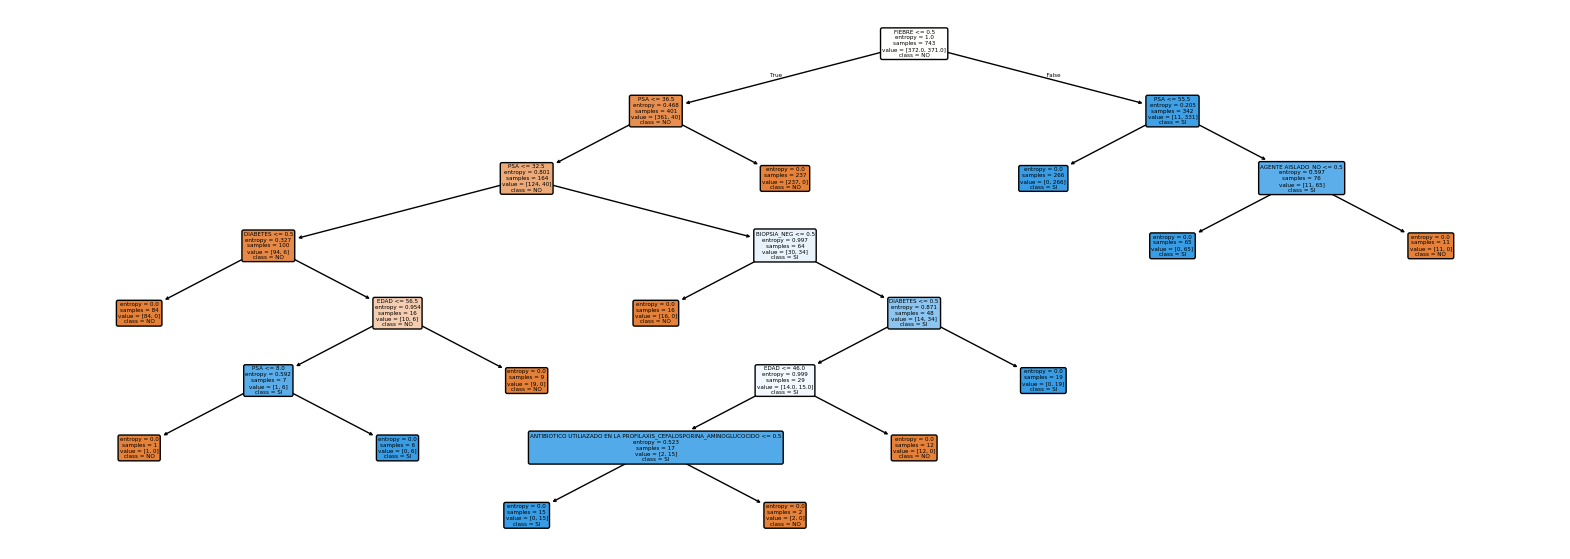

In [ ]:
# Creamos la figura y pintamos el arbol
plt.figure(figsize=(20,7))
plot_tree(model_Tree, feature_names=X_train.columns.values, class_names=labelencoder.classes_, rounded=True, filled=True)
plt.show()

## **Matrices de confucion**

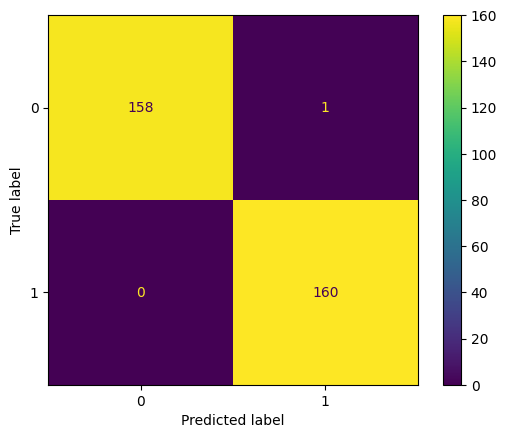

In [ ]:
# Creamos una prediccion
y_pred = model_Tree.predict(X_test)

# Creamos una matrix de confucion
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Tree.classes_)
disp.plot()

### **KNN K-vecinos**

In [ ]:
# Instanciamos el modelo de KNN y lo entrenamos con el set de datos
model_Knn = neighbors.KNeighborsClassifier(n_neighbors=2, metric='minkowski') #minkowski - euclidean
model_Knn.fit(X_train, Y_train) #70% datos

KNeighborsClassifier(n_neighbors=2)

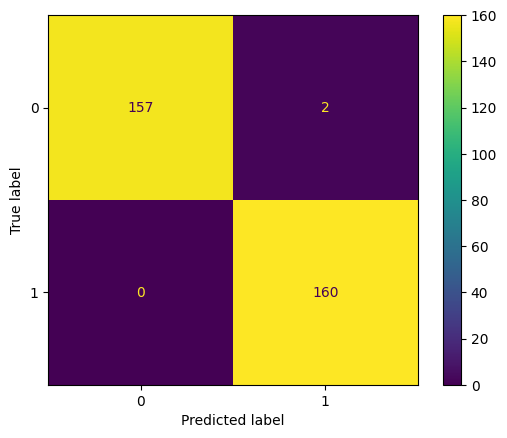

In [ ]:
# Creamos una prediccion del modelo KNN
y_pred = model_Knn.predict(X_test)

# Creamos la matrix de confucion
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Knn.classes_)
disp.plot()

### **Evaluamos el modelo del arbol**

In [ ]:
#Evaluación sobre el conjunto de prueba
Y_pred = model_Tree.predict(X_test) #30% datos

exactitud_arbol=accuracy_score(Y_test, Y_pred) #Y_test es el valor real.
print('Exactitud arbol: ', exactitud_arbol)

Exactitud arbol:  0.9968652037617555


### KNN(X_test, Y_test)

In [ ]:
#Evaluación del modelo Knn con el 30% de los datos
Y_pred = model_Knn.predict(X_test)

exactitud_knn=accuracy_score(Y_test, Y_pred)
print('Exactitud KNN: ', exactitud_knn)

Exactitud KNN:  0.9937304075235109


In [ ]:
import tensorflow as tf

input_tensor = tf.Variable(X_train.numpy().astype('float32'))  # Added .numpy() since X_train is a tensor
with tf.GradientTape() as tape:
    predictions = final_model(input_tensor)
gradients = tape.gradient(predictions, input_tensor)

feature_importance = np.abs(gradients.numpy()).mean(axis=0)
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance Based on Gradients')
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(feature_importance_df)